# Name: Vatsal Vinay Parikh


# Multiclass Classification : Vector Embedding Classification

---

## Problem Statement:


The dataset for this problem might seem peculiar in the first look, but this is how LLM's actually see and use the data. LLM's are based on the concept of vector embeddings which tries to capture the semantic relation between in the words in a sentence.

**What are Vector embeddings ?**

- Vector embeddings are numerical representations that capture the relationships and meaning of words, phrases and other data types. Through vector embeddings, essential characteristics or features of an object are translated into a concise and organized array of numbers, helping computers rapidly retrieve information.

For instance,
- Notice how the distance between vector embeddings of 'King' and 'Man' is similar to the distance between that of 'Queen' and 'Woman'.
- Similarly, the distance between between vector embeddings of 'King' and 'Queen' is similar to that of 'Man' and 'Woman', implying a similar relation between both.

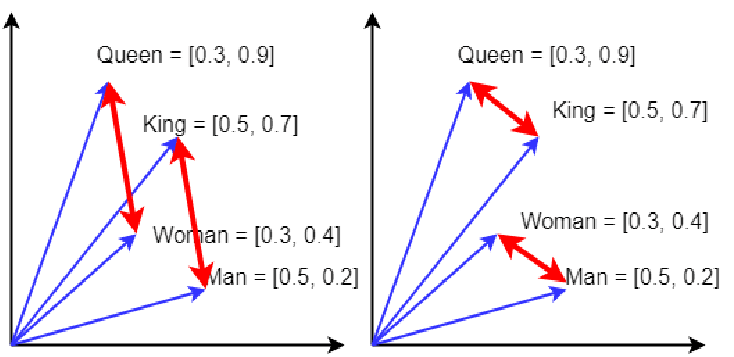


**How does this work?**
- For any query or a 'prompt' that a user enters, they are first converted into these vector embeddings and after feature engineering in a certain way, metrics, such as *'cosine similarity'* scores are used to retrieve information that are most closely related to the given 'prompt'.
- Every LLM, i.e Google's BERT, Open AI's Chat GPT, uses a different model to convert sentences/documents into vector embeddings.
- This is exactly how search engines such as "Google" work as well.


---

## Dataset Description :

The dataset below contains the vector embeddings of 54,000 rows which have been put into 10 classes.
The objective is to develop a predictive model that can accurately take a set of vector embeddings as input and put them into a given class.

## Aim:
* To perform multi-class classification on the listed vector embeddings.

## Dataset Attributes
Here is a brief overview of the dataset columns:

| Column Name | Description |
| --- | --- |
| **Content** | A NumPy array of floating point numbers that contain the vector embeddings of a given sentence   |
| **Class**   | The numerical classes that each of the sentence were separated into based on the content in them |


---
## Load the dataset :

In [2]:
# Importing required libraries
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_pickle('train.pkl', compression = 'gzip')
data.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_375,feature_376,feature_377,feature_378,feature_379,feature_380,feature_381,feature_382,feature_383,target
20219,-0.441182,0.039758,-0.096716,-0.325088,-0.281903,0.396630,0.479592,0.022123,0.037306,0.100461,...,0.090767,0.132293,-0.072522,-0.489568,0.183016,-0.075469,-0.304630,0.639570,0.244022,10
10100,0.005069,0.062893,0.332654,-0.268345,0.351607,0.179265,1.085914,0.137451,-0.215401,-0.238715,...,-0.470249,-0.016706,-0.171675,0.025053,0.345940,-0.380571,-0.011566,0.182901,0.450810,7
6202,-0.238280,0.062563,0.580820,-0.308987,0.168390,0.464604,0.770424,0.408037,-0.604461,-0.245012,...,-0.651022,-0.129468,0.136676,0.012791,-0.058777,-0.583225,-0.848802,0.374475,0.141444,8
6248,0.191293,0.693149,0.100221,-0.074036,0.283898,0.199221,0.677960,0.240535,0.181713,-0.235484,...,-0.074472,-0.355305,-0.327696,-0.150666,0.329692,-0.162642,-0.361339,0.279542,0.182272,1
20758,-0.038615,0.102616,0.350334,-0.167825,0.520621,0.019089,0.123427,0.810578,0.121413,-0.159571,...,-0.437117,-0.680356,-0.446885,-0.179272,-0.119086,-0.672074,-0.017897,0.165097,0.082835,6


---

## Data Analysis

- Summarize the data. How much data is present? What is the shape of the dataset? What is the shape of each row?

- Convert the array of values into columns such that each value of the array represents a 'feature' of the sentence. This should leave you with a dataset with 384 columns with features and 1 column with the target variable.

- Try to Analyze and discuss the relationships between the attributes.

- Use appropriate visualization techniques to visualize the features.

**How much data is present?**

In [2]:
# How much data is present?
rows, cols = data.shape
print("Number of rows: ", rows, end=" ")
print("\nNumber of columns: ", cols)

Number of rows:  54000 
Number of columns:  385


**Summarize the data.**

In [3]:
# Getting the concise summary about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54000 entries, 20219 to 23720
Columns: 385 entries, feature_0 to target
dtypes: float32(384), int64(1)
memory usage: 79.9 MB


**What is the shape of the dataset? What is the shape of each row?**

In [4]:
# What is the shape of the dataset?
print("Shape of the dataset:", data.shape)

# What is the shape of each row?
print("Shape of each row:", data.iloc[0].shape)

Shape of the dataset: (54000, 385)
Shape of each row: (385,)


**Convert the array of values into columns such that each value of the array represents a 'feature' of the sentence. This should leave you with a dataset with 384 columns with features and 1 column with the target variable.**

In [5]:
# Extract features and target variable
features = data.drop(columns=['target'])
target = data['target']

num_features = features.shape[1]

# Rename the columns to feature_0, feature_1, ..., feature_383
feature_columns = [f"feature_{i}" for i in range(num_features)]
features.columns = feature_columns

# Combine features and target variable
data = pd.concat([features, target], axis=1)

# Display the result
print(data.head())

       feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
20219  -0.441182   0.039758  -0.096716  -0.325088  -0.281903   0.396630   
10100   0.005069   0.062893   0.332654  -0.268345   0.351607   0.179265   
6202   -0.238280   0.062563   0.580820  -0.308987   0.168390   0.464604   
6248    0.191293   0.693149   0.100221  -0.074036   0.283898   0.199221   
20758  -0.038615   0.102616   0.350334  -0.167825   0.520621   0.019089   

       feature_6  feature_7  feature_8  feature_9  ...  feature_375  \
20219   0.479592   0.022123   0.037306   0.100461  ...     0.090767   
10100   1.085914   0.137451  -0.215401  -0.238715  ...    -0.470249   
6202    0.770424   0.408037  -0.604461  -0.245012  ...    -0.651022   
6248    0.677960   0.240535   0.181713  -0.235484  ...    -0.074472   
20758   0.123427   0.810578   0.121413  -0.159571  ...    -0.437117   

       feature_376  feature_377  feature_378  feature_379  feature_380  \
20219     0.132293    -0.072522    -0.489568    

- The original array of values (after dropping the target column) is reshaped into columns, with each value becoming a feature. There are 384 features in total (feature_0 to feature_383).


**Try to Analyze and discuss the relationships between the attributes.**

In [8]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0     1.000000   0.101298  -0.028905   0.001190   0.045214   0.004380   
feature_1     0.101298   1.000000  -0.081215  -0.040676  -0.007938   0.000783   
feature_2    -0.028905  -0.081215   1.000000   0.034490  -0.031665  -0.059725   
feature_3     0.001190  -0.040676   0.034490   1.000000   0.024215  -0.015235   
feature_4     0.045214  -0.007938  -0.031665   0.024215   1.000000   0.028580   
...                ...        ...        ...        ...        ...        ...   
feature_380   0.070608   0.117754  -0.105141  -0.065420   0.024262  -0.054110   
feature_381  -0.173797  -0.012418  -0.090392  -0.122848  -0.146515  -0.087997   
feature_382   0.034732   0.054153  -0.103683  -0.049500   0.019919   0.033022   
feature_383  -0.042406  -0.042450   0.044472   0.018019   0.061870  -0.018196   
target       -0.081890   0.008885   0.009545  -0.151611   0.067854   0.062799   

       

The correlation matrix provides insight into the relationships between different features and the target variable:

1. Some features show positive correlations with each other and with the target variable. For example, feature_1 has a positive correlation with feature_6 (0.160) and feature_7 (0.019), as well as with the target variable (0.009).

2. Conversely, some features exhibit negative correlations with each other and with the target. For instance, feature_0 has a negative correlation with feature_381 (-0.174) and feature_383 (-0.042).


**Use appropriate visualization techniques to visualize the features.**

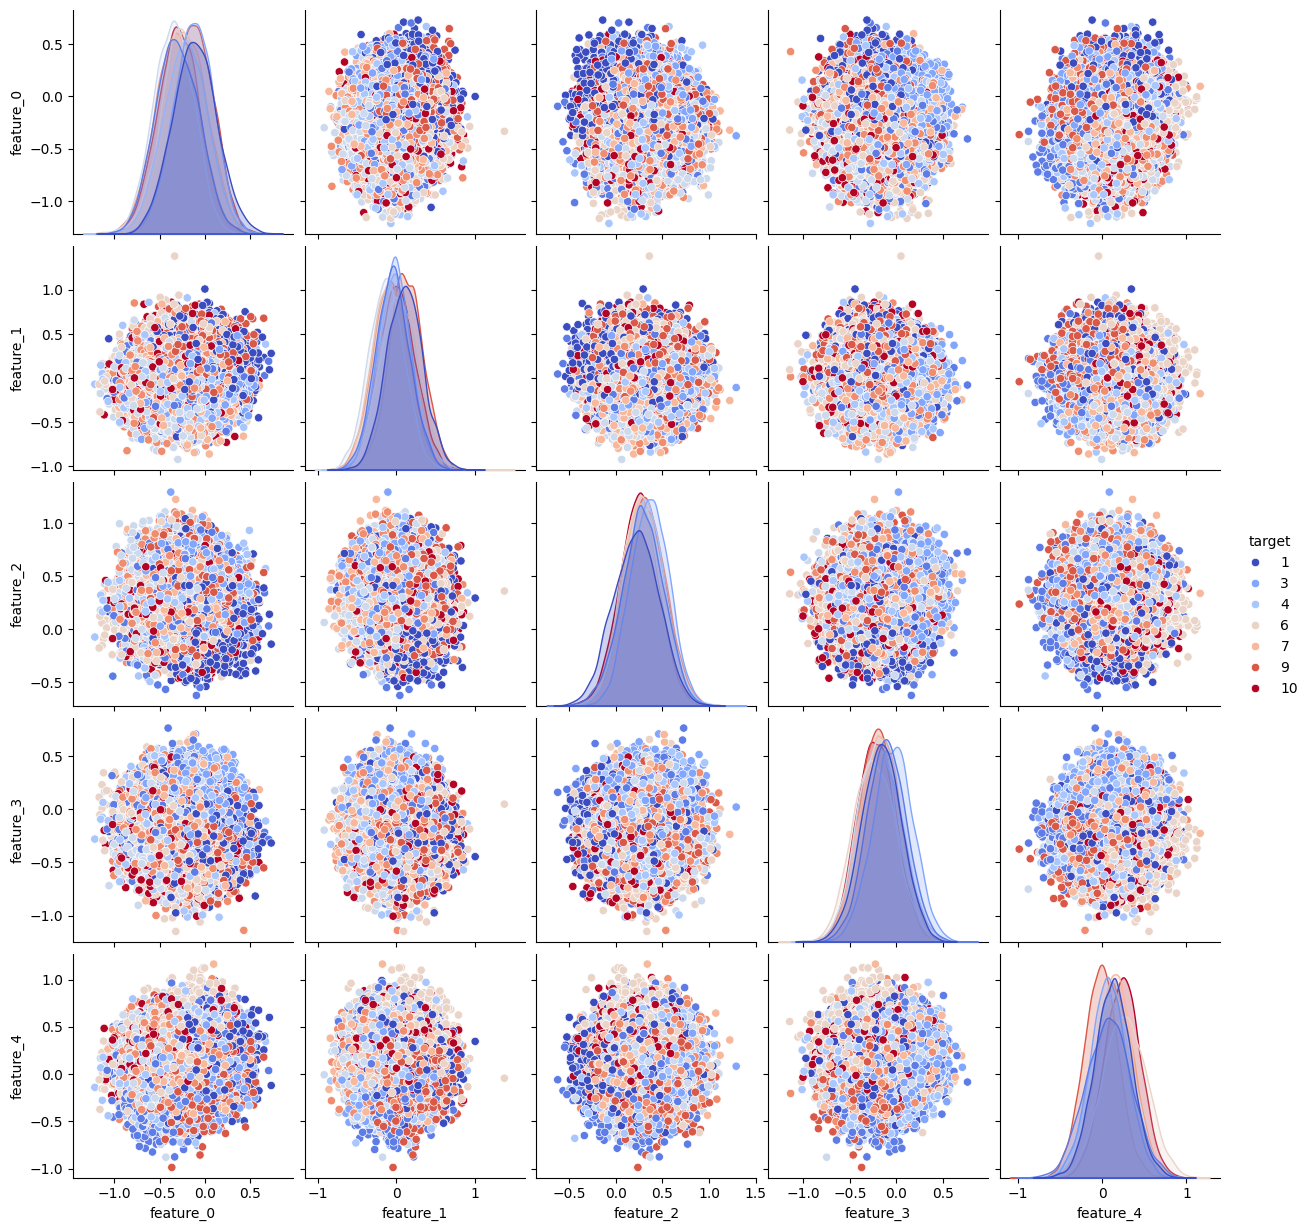

In [6]:
# Select some features to visualize (e.g., first 5 features)
selected_features = data.columns[:5].tolist() + ['target']

# Pairplot of selected features
sns.pairplot(data[selected_features], hue='target', palette='coolwarm')
plt.show()

- Most features exhibit distributions that are approximately normal or uniform, with varying degrees of skewness and outliers.

- Strong correlations between features can be seen.

- Overlapping classes suggest that the selected features may not be sufficient for accurate classification on their own.

<ipython-input-7-e4d82cb59039>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[selected_features + ['target']], x='target', y=selected_features[0], palette='coolwarm')


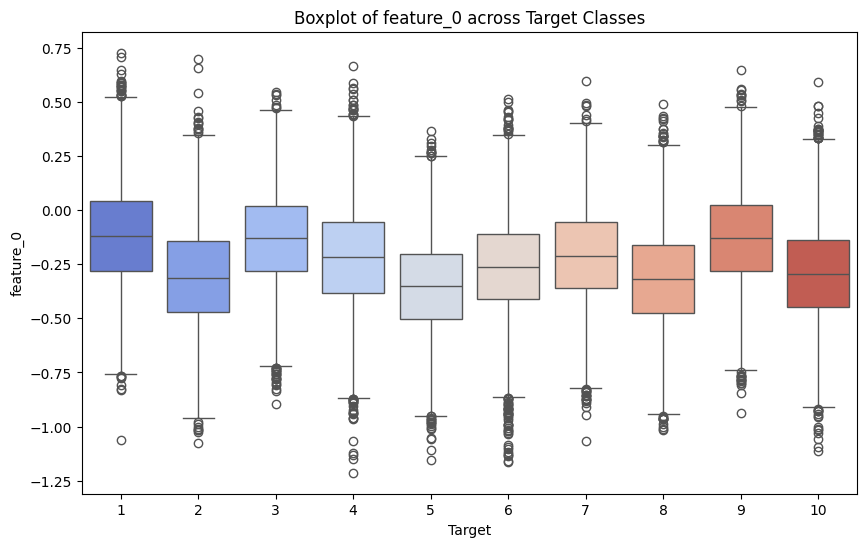

In [7]:
# Select some features to visualize
selected_features = data.columns[:5].tolist()

# Boxplot of selected features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[selected_features + ['target']], x='target', y=selected_features[0], palette='coolwarm')
plt.xlabel('Target')
plt.ylabel(selected_features[0])
plt.title(f'Boxplot of {selected_features[0]} across Target Classes')
plt.show()

- The boxplot visualizes the distribution of the first selected feature across different classes of the target variable.

- The boxes for different classes are almost similar in position or size, suggests that the feature may be predictive of the target variable and follows a normal distribution.


---

## PCA

- Perform Principal Component Analysis (PCA) with 100 components

- Visualize the explained variance for principal components

- Perform clustering analysis with top 2 components with highest explained variance and visualize the result in scatter plot.

**Perform Principal Component Analysis (PCA) with 100 components**

In [4]:
# Separate features and target variable
X = data.drop(columns=['target'])
y = data[['target']]

# Perform PCA with 100 components
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

**Visualize the explained variance for principal components**

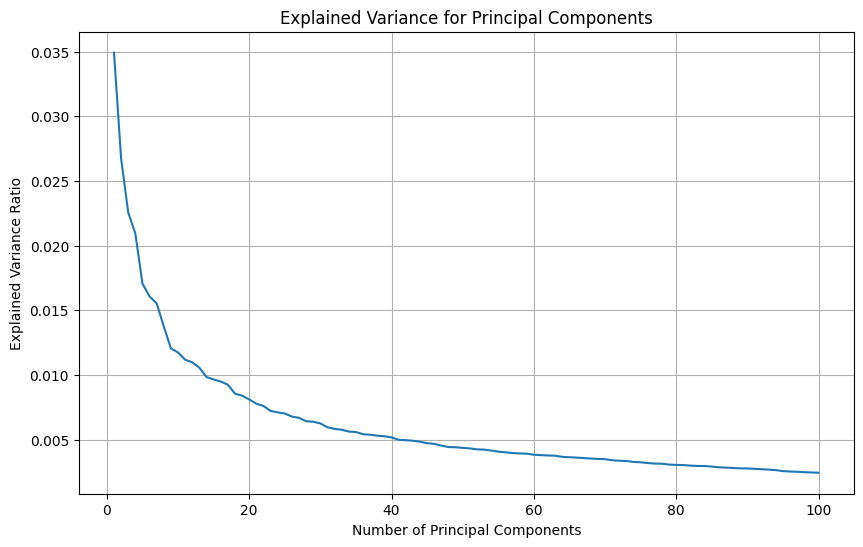

In [5]:
# Fit PCA to calculate explained variance
pca.fit(X)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), pca.explained_variance_ratio_)
plt.title('Explained Variance for Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

- As the number of principal components increases, the explained variance ratio decreases.
- This rapid decrease indicates that the initial principal components capture a significant amount of variance in the data.
- The point where the curve starts to flatten indicates diminishing returns in terms of explaining additional variance by adding more principal components.

**Perform clustering analysis with top 2 components with highest explained variance and visualize the result in scatter plot.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


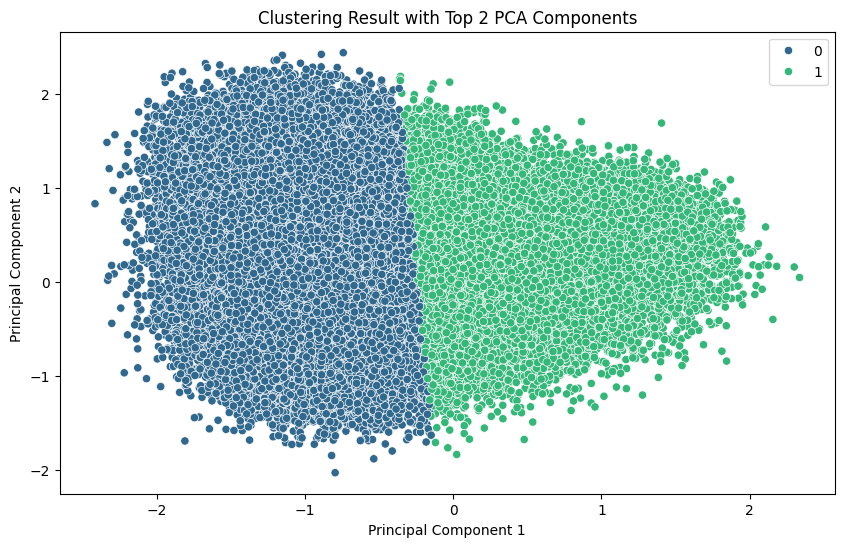

In [6]:
# Extract the top 2 components with highest explained variance
top_2_components = pca.components_[:2]

# Transform the data using these 2 components
X_transformed = X.dot(top_2_components.T)

# Perform clustering on the transformed data
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_transformed)

# Visualize the clustering result in a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_transformed.iloc[:, 0], y=X_transformed.iloc[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('Clustering Result with Top 2 PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

- Each point represents a data sample, and its position on the plot is determined by the values of the first and second principal components.

- The scatter plot shows the clustering result using the top 2 principal components obtained from PCA.


---

## Data Pre-processing & Feature Engineering

- Perform Feature Engineering on the dataset.

- Hint: you can use the reduced number of features from PCA for more efficient feature processing


**Perform Feature Engineering on the dataset.**

In [12]:
import warnings
warnings.filterwarnings("ignore")

# Convert X_pca to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 101)])

interaction_features = pd.DataFrame()
for i in range(100):
    for j in range(i+1, 100):
        interaction_features[f'interaction_{i}_{j}'] = X_pca[:, i] * X_pca[:, j]

# Combine original features and interaction features
final_features = pd.concat([X_pca_df, interaction_features], axis=1)

# Standardize the features
scaler = StandardScaler()
final_features_scaled = scaler.fit_transform(final_features)

# Display the shape of the final feature matrix
print("Shape of the final feature matrix:", final_features_scaled.shape)

Shape of the final feature matrix: (54000, 5050)


- Interaction features are created by multiplying each pair of PCA components.
This step allows capturing non-linear relationships and interactions between the principal components.

- Standard scaling is applied to the final feature matrix to ensure that all features have a mean of 0 and a standard deviation of 1.

- The final feature matrix has a shape of (54000, 5050), meaning it contains 54000 samples and 5050 features after feature engineering.

---
## Modeling

- Train at least ***three*** different classifier models (e.g., SVM, Logistic Regression, KNN, etc.) and optimize hyperparameters to enhance performance.

- Implement a validation pipeline utilizing K-fold cross-validation and your choice of dimensionality reduction technique to choose the best (Model + Number of features). For each classifier, report classification accuracy, precision, recall, and F1 score with both macro and weighted averages.

- Hint : Use sampling techniques to reduce the dataset size for creating initial models. This would decrease the model run time and would create an intuition about selecting appropriate classification models.

**Use sampling techniques to reduce the dataset size for creating initial models. This would decrease the model run time and would create an intuition about selecting appropriate classification models.**

In [16]:
# Sample the dataset to reduce size to only include 20% of the original dataset
data_sampled = data.sample(frac=0.2, random_state=42)

# Split features and target variable
X = data_sampled.drop(columns=['target'])
y = data_sampled['target']

**Train at least three different classifier models (e.g., SVM, Logistic Regression, KNN, etc.) and optimize hyperparameters to enhance performance.**

In [15]:
# Define preprocessing pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))  # Keep 95% of the variance
])

# Define classifiers
classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier()
}

**Implement a validation pipeline utilizing K-fold cross-validation and your choice of dimensionality reduction technique to choose the best (Model + Number of features). For each classifier, report classification accuracy, precision, recall, and F1 score with both macro and weighted averages.**

In [ ]:
# Train and evaluate models
for clf_name, clf in classifiers.items():
    # Define pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    # Grid search for hyperparameter optimization
    param_grid = {}
    if clf_name == 'SVM':
        param_grid = {
            'classifier__C': [0.01, 0.1],
            'classifier__kernel': ['linear']
        }
    elif clf_name == 'Logistic Regression':
        param_grid = {
            'classifier__C': [0.1, 1]
        }
    elif clf_name == 'KNN':
        param_grid = {
            'classifier__n_neighbors': [3, 5]
        }

    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    best_pipeline = grid_search.best_estimator_

    # Cross-validation for evaluation
    scores = cross_val_score(best_pipeline, X, y, cv=3, scoring='accuracy')
    accuracy = np.mean(scores)

    # Print accuracy
    print(f"{clf_name} Accuracy:", accuracy)

    # Classification report
    y_pred = best_pipeline.predict(X)
    print(f"\nClassification Report for {clf_name}:")
    print(classification_report(y, y_pred))
    print("="*50)

    # Print best parameters
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    print("="*50)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
SVM Accuracy: 0.6968518518518518

Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.69      0.72      0.71      1079
           2       0.77      0.85      0.81      1109
           3       0.83      0.89      0.86      1076
           4       0.72      0.64      0.67      1110
           5       0.90      0.94      0.92      1086
           6       0.94      0.93      0.93      1057
           7       0.74      0.60      0.66      1068
           8       0.81      0.80      0.81      1044
           9       0.82      0.86      0.84      1104
          10       0.85      0.87      0.86      1067

    accuracy                           0.81     10800
   macro avg       0.81      0.81      0.81     10800
weighted avg       0.81      0.81      0.81     10800

Best parameters for SVM: {'classifier__C': 0.01, 'classifier__kernel': 'linear'}
Fitting 3 folds for each of 2 candid

---
## Evaluation and Reporting

- Divide the train dataset into 2 sets : Training set + Validation set

- Select the model that is expected to performs optimally on the Validation set and provide the predictions accordingly. Give clear conclusions

**Divide the train dataset into 2 sets : Training set + Validation set**

In [17]:
# Divide the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Select the model that is expected to performs optimally on the Validation set and provide the predictions accordingly. Give clear conclusions**

Based on the accuracy scores and the performance metrics, the SVM model with the parameters:

 `{'classifier__C': 0.01, 'classifier__kernel': 'linear'}` is expected to perform optimally on the validation set. Here are the reasons:

1. SVM has the highest accuracy among the three models (0.69685).
2. SVM has generally higher precision and recall values across most classes compared to Logistic Regression and KNN.
3. SVM has the highest average F1-score, indicating a good balance between precision and recall.

Therefore, it is recommended to select the SVM model for making predictions on the validation set.

In [18]:
# Initialize the SVM classifier with the linear kernel
svm_classifier = SVC(kernel='linear', C=0.01)

# Train the model on the training set
svm_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_pred = svm_classifier.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)

# Display accuracy
print("Accuracy on validation set:", accuracy)

Accuracy on validation set: 0.7372427983539095
